In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
from sklearn.cluster import KMeans
import numpy as np

# KMEANS

# 全部

In [135]:
df_origin = pd.read_excel(r'./card_feature_1128.xlsx',encoding='utf-16',sheet_name='all_z')
df = df_origin.drop(['Unnamed: 0'], axis=1)
card_name = df_origin['Unnamed: 0']
df

,Z國內回饋,Z國外回饋,Z國內哩程,Z國外哩程,Z自助加油,Z人工加油,Z免費接送次數,Z電影折扣優惠,Z網購刷卡回饋,Z保險刷卡回饋,...,Z保險,Z加油,Z行動支付,Z超商,Z交通,Z電影,Z旅遊機票飯店,Z網購,Z繳稅繳費,Z現金回饋
0,-0.343251,-0.359616,-0.263384,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.103921,-0.103817,-0.112808,-0.108305,-0.096907,-0.107092,-0.106166,-0.110602,-0.112616,-0.106151
1,-0.343251,-0.359616,-0.084066,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,1.085406,-0.223425,...,-0.067833,-0.061977,-0.085360,-0.066386,-0.087250,-0.067160,-0.084066,-0.071493,-0.112616,-0.086971
2,3.435343,3.137118,-0.037972,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.043142,-0.058758,-0.054480,-0.044651,-0.067935,-0.057944,-0.037972,-0.029375,-0.024519,-0.045872
3,2.718819,2.770853,0.040325,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,0.000543,-0.031401,-0.008734,-0.030678,0.012542,-0.041050,0.040325,-0.000293,-0.057935,0.032217
4,2.718819,1.205618,-0.109324,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.102021,-0.108645,-0.105946,-0.103647,-0.113003,-0.113236,-0.109324,-0.106591,-0.112616,-0.106836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,-0.343251,-0.359616,-0.113112,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.113417,-0.113472,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001
302,-0.343251,-0.359616,-0.097958,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.090625,-0.074851,-0.088791,-0.085017,-0.103346,-0.076375,-0.097958,-0.094557,-0.112616,-0.096561
303,-0.343251,-0.359616,0.004334,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,0.013838,0.024922,0.042732,0.064027,0.022199,-0.004189,0.004334,-0.013330,0.081804,0.015777
304,-0.343251,-0.359616,-0.113112,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.113417,-0.113472,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001


In [136]:
card_name

0          三信銀行-VISA白金卡
1       上海商銀-TeresaCard
2      上海商銀-小小兵Bello回饋卡
3              上海商銀-簡單卡
4      土地銀行-JCB一卡通聯名晶緻卡
             ...       
301       聯邦銀行-農金一卡通聯名卡
302        聯邦銀行-樂活悠遊御璽卡
303       聯邦銀行-賴點一卡通御璽卡
304          聯邦銀行-聯邦旅遊卡
305        聯邦銀行-聯邦銀行世界卡
Name: Unnamed: 0, Length: 306, dtype: object

In [60]:
X = np.array(df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


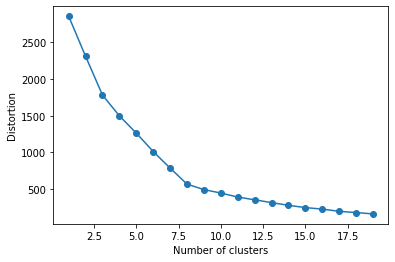

In [61]:
from sklearn.cluster import k_means_
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

distortions = []
# Silhous = [] 
num_clusters = range(1,20)
for num in num_clusters:
    print(num)
    kmeanModel = k_means_.KMeans(n_clusters = num, n_init=20, max_iter=300, random_state=0).fit(X)
    distortions.append(kmeanModel.inertia_)
        
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [72]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
labels = kmeans.labels_
labels

array([3, 3, 1, 1, 1, 3, 3, 0, 0, 4, 3, 7, 3, 3, 3, 3, 0, 3, 3, 3, 1, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 2, 2, 3, 4,
       3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 1, 3, 3, 3, 3, 1, 3, 3, 7, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 2, 3, 3, 2, 3, 3, 3,
       3, 7, 3, 3, 0, 3, 0, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 3,
       3, 1, 2, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 5, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 7, 1, 3, 1, 1, 3, 3, 3, 3, 7, 3,
       3, 4, 4, 7, 0, 3, 1, 0, 0, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       5, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 7, 5, 3, 3, 3, 1, 7, 3,
       3, 6, 3, 4, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       4, 3, 3, 3, 3, 7, 1, 3, 3, 3, 7, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 5, 2, 1, 3, 3, 3, 3, 3, 4,

In [210]:
labels = pd.DataFrame(labels, columns = ['label'])
pd_label = pd.concat([df, labels, card_name], axis = 1)
pd_label.loc[:30]
pd_label[pd_label["label"]==1]

,X,國泰世華.KOKO.icash聯名卡,三信銀行.VISA白金卡,上海商銀.TeresaCard,上海商銀.小小兵Bello回饋卡,上海商銀.簡單卡,土地銀行.JCB一卡通聯名晶緻卡,中國信託.ANA聯名卡,中國信託.LINE.Pay卡,中國信託.MUJI無印良品聯名卡,...,遠東商銀.快樂信用卡.1,聯邦銀行.法拉利無限卡.1,聯邦銀行.紅利卡.1,聯邦銀行.理財型白金卡.1,聯邦銀行.微風聯名卡.1,聯邦銀行.賴點一卡通御璽卡.1,國泰世華.KOKO.icash聯名卡.1,總計,label,Unnamed: 0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1.0,上海商銀-小小兵Bello回饋卡
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1.0,上海商銀-簡單卡
20,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,1.0,中國信託-中信商旅鈦金卡
38,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1.0,元大銀行-Wi-Ho!Online聯名卡
47,60,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,11,1.0,元大銀行-樂遊卡
54,71,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1.0,日盛銀行-無限卡
111,148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,1.0,永豐銀行-現金回饋卡
164,214,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,1.0,合作金庫-合作金庫世界卡
182,238,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1.0,星展銀行-炫晶御璽卡
250,328,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1.0,華南銀行-享利樂活Combo卡


# 回饋

In [76]:
df = pd.read_excel(r'./card_feature_1128.xlsx',encoding='utf-16',sheet_name='all_z_p')
df = df.drop(['Unnamed: 0'], axis=1)
df

,Z國內回饋,Z國外回饋,Z國內哩程,Z國外哩程,Z自助加油,Z人工加油,Z免費接送次數,Z電影折扣優惠,Z網購刷卡回饋,Z保險刷卡回饋
0,-0.343251,-0.359616,-0.263384,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425
1,-0.343251,-0.359616,-0.084066,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,1.085406,-0.223425
2,3.435343,3.137118,-0.037972,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425
3,2.718819,2.770853,0.040325,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425
4,2.718819,1.205618,-0.109324,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425
...,...,...,...,...,...,...,...,...,...,...
301,-0.343251,-0.359616,-0.113112,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425
302,-0.343251,-0.359616,-0.097958,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425
303,-0.343251,-0.359616,0.004334,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425
304,-0.343251,-0.359616,-0.113112,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


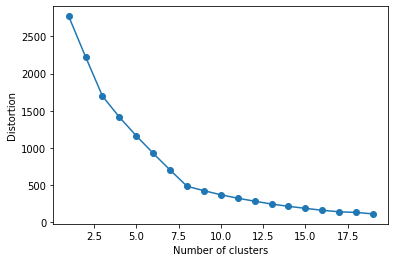

In [77]:
X = np.array(df)
from sklearn.cluster import k_means_
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

distortions = []
# Silhous = [] 
num_clusters = range(1,20)
for num in num_clusters:
    print(num)
    kmeanModel = k_means_.KMeans(n_clusters = num, n_init=20, max_iter=300, random_state=0).fit(X)
    distortions.append(kmeanModel.inertia_)
        
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [78]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
labels = kmeans.labels_
labels

array([0, 0, 4, 4, 4, 0, 0, 7, 7, 5, 0, 6, 0, 0, 0, 0, 7, 0, 0, 0, 4, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 4, 0, 3, 3, 0, 5,
       0, 0, 0, 4, 0, 0, 0, 4, 0, 3, 4, 0, 0, 0, 0, 4, 0, 0, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0,
       0, 6, 0, 0, 7, 0, 7, 0, 4, 0, 0, 4, 0, 4, 0, 0, 4, 0, 0, 3, 0, 0,
       0, 4, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 6, 4, 0, 4, 4, 0, 0, 0, 0, 6, 0,
       0, 5, 5, 6, 7, 0, 4, 7, 7, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 7, 7, 0, 7, 0, 7, 0, 0, 7, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 6, 2, 0, 0, 0, 4, 6, 0,
       0, 1, 0, 5, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       5, 0, 0, 0, 0, 6, 4, 0, 0, 0, 6, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 3, 4, 0, 0, 0, 0, 0, 5,

In [164]:
labels = pd.DataFrame(labels, columns = ['label'])
pd_label = pd.concat([df, labels, card_name], axis = 1)
pd_label.loc[:30]
pd_label[pd_label["label"]==7]

,Z國內回饋,Z國外回饋,Z國內哩程,Z國外哩程,Z自助加油,Z人工加油,Z免費接送次數,Z電影折扣優惠,Z網購刷卡回饋,Z保險刷卡回饋,...,Z行動支付,Z超商,Z交通,Z電影,Z旅遊機票飯店,Z網購,Z繳稅繳費,Z現金回饋,label,Unnamed: 0
21,-0.343251,-0.359616,-0.113112,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.15402,5.968592,...,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001,7,中國信託-中國信託寰遊美國運通卡AMEX_金卡
81,-0.343251,-0.359616,-0.097958,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.15402,5.305162,...,-0.088791,-0.098990,-0.093688,-0.094805,-0.097958,-0.103583,-0.112616,-0.096561,7,台新銀行-三商美邦人壽聯名卡


In [165]:
pd_label[pd_label["label"]==5]

,Z國內回饋,Z國外回饋,Z國內哩程,Z國外哩程,Z自助加油,Z人工加油,Z免費接送次數,Z電影折扣優惠,Z網購刷卡回饋,Z保險刷卡回饋,...,Z行動支付,Z超商,Z交通,Z電影,Z旅遊機票飯店,Z網購,Z繳稅繳費,Z現金回饋,label,Unnamed: 0
11,-0.343251,-0.359616,-0.113112,-0.224925,-0.134924,-0.122943,3.796693,-0.191925,-0.15402,-0.223425,...,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.110946,5,中國信託-LEXUS聯名卡
165,-0.343251,-0.359616,-0.110586,-0.224925,-0.134924,-0.122943,3.796693,-0.191925,-0.15402,-0.223425,...,-0.112808,-0.112962,-0.113003,-0.113236,-0.110586,-0.112608,-0.112616,-0.110946,5,合作金庫-合庫無限卡
240,-0.343251,-0.359616,-0.113112,-0.224925,-0.134924,-0.122943,3.796693,-0.191925,-0.15402,-0.223425,...,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001,5,渣打銀行-優先理財VISA無限卡
305,-0.343251,-0.359616,-0.113112,-0.224925,-0.134924,-0.122943,3.796693,-0.191925,-0.15402,-0.223425,...,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001,5,聯邦銀行-聯邦銀行世界卡


# 行為已正規

In [232]:
df = pd.read_excel(r'./reg_card_feature_for_reccommend_1st.xlsx',encoding='utf-16')
df = df.drop(['Unnamed: 0'], axis=1)
df

,卡活動,保險,加油,行動支付,超商,交通,電影,旅遊機票飯店,網購,繳稅繳費,現金回饋
0,0.192982,0.087719,0.105263,0.000000,0.052632,0.087719,0.070175,0.192982,0.035088,0.000000,0.175439
1,0.130573,0.076433,0.101911,0.076433,0.095541,0.025478,0.095541,0.146497,0.130573,0.000000,0.121019
2,0.139021,0.058452,0.053712,0.080569,0.069510,0.022117,0.056872,0.187994,0.131122,0.045814,0.154818
3,0.116412,0.057252,0.048664,0.086832,0.050573,0.037214,0.044847,0.231870,0.106870,0.017176,0.202290
4,0.125000,0.125000,0.062500,0.125000,0.125000,0.000000,0.000000,0.125000,0.125000,0.000000,0.187500
...,...,...,...,...,...,...,...,...,...,...,...
301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
302,0.125000,0.062500,0.125000,0.109375,0.093750,0.015625,0.125000,0.125000,0.093750,0.000000,0.125000
303,0.138298,0.054828,0.070376,0.111293,0.093290,0.034370,0.058101,0.152209,0.081015,0.052373,0.153846
304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


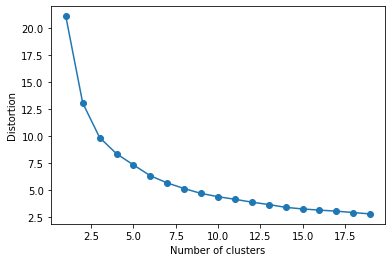

In [233]:
X = np.array(df)
from sklearn.cluster import k_means_
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

distortions = []
# Silhous = [] 
num_clusters = range(1,20)
for num in num_clusters:
    print(num)
    kmeanModel = k_means_.KMeans(n_clusters = num, n_init=20, max_iter=300, random_state=0).fit(X)
    distortions.append(kmeanModel.inertia_)
        
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [234]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
labels = kmeans.labels_
labels

array([4, 2, 2, 4, 2, 0, 4, 0, 0, 0, 1, 1, 2, 2, 0, 2, 4, 4, 0, 4, 2, 0,
       0, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 1, 0, 0, 4, 2, 0, 2, 0, 2, 5, 2,
       3, 0, 2, 2, 0, 0, 4, 4, 0, 0, 2, 0, 4, 2, 2, 2, 0, 4, 3, 4, 2, 2,
       2, 2, 0, 0, 2, 4, 0, 2, 2, 0, 2, 2, 4, 4, 4, 2, 0, 2, 4, 2, 2, 2,
       0, 4, 2, 4, 4, 4, 4, 0, 2, 2, 0, 1, 4, 4, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 0, 4, 2, 2, 4, 2, 0, 2, 2, 0, 2, 2, 2, 0, 4, 0, 4, 4, 0, 0, 2,
       1, 4, 0, 2, 2, 0, 2, 2, 0, 0, 4, 2, 0, 2, 2, 4, 2, 2, 2, 2, 0, 0,
       4, 2, 2, 0, 2, 2, 2, 0, 0, 0, 4, 1, 2, 2, 1, 1, 4, 4, 4, 0, 0, 2,
       0, 0, 2, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 6, 1, 4, 4, 0, 2, 2, 4,
       2, 2, 1, 4, 0, 2, 2, 0, 4, 6, 1, 1, 0, 2, 2, 2, 2, 4, 2, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 4, 0, 0, 1, 2, 4, 0, 0, 4, 0, 4,
       0, 2, 0, 0, 0, 0, 0, 2, 4, 2, 4, 0, 4, 2, 0, 4, 0, 4, 2, 1, 2, 4,
       2, 0, 2, 2, 2, 4, 0, 2, 4, 2, 2, 2, 0, 4, 2, 2, 0, 6, 2, 4, 0, 0,
       0, 2, 0, 0, 0, 3, 2, 3, 0, 3, 3, 2, 0, 2, 2,

In [239]:
labels = pd.DataFrame(labels, columns = ['label'])
labels
pd_label = pd.concat([df, labels, card_name], axis = 1)
# # pd_label.loc[:30]
len(pd_label[pd_label["label"]==2])
pd_label[pd_label["label"]==2]

,卡活動,保險,加油,行動支付,超商,交通,電影,旅遊機票飯店,網購,繳稅繳費,現金回饋,label,Unnamed: 0
1,0.130573,0.076433,0.101911,0.076433,0.095541,0.025478,0.095541,0.146497,0.130573,0.000000,0.121019,2,上海商銀-TeresaCard
2,0.139021,0.058452,0.053712,0.080569,0.069510,0.022117,0.056872,0.187994,0.131122,0.045814,0.154818,2,上海商銀-小小兵Bello回饋卡
4,0.125000,0.125000,0.062500,0.125000,0.125000,0.000000,0.000000,0.125000,0.125000,0.000000,0.187500,2,土地銀行-JCB一卡通聯名晶緻卡
12,0.092648,0.056677,0.067029,0.112125,0.077382,0.035971,0.062467,0.164064,0.119495,0.047552,0.164590,2,中國信託-LINE Pay卡
13,0.075000,0.105000,0.090000,0.120000,0.105000,0.045000,0.090000,0.145000,0.105000,0.015000,0.105000,2,中國信託-MUJI無印良品聯名卡
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.118644,0.050847,0.107345,0.169492,0.050847,0.045198,0.045198,0.158192,0.084746,0.028249,0.141243,2,聯邦銀行-理財型白金卡
299,0.120000,0.040000,0.120000,0.120000,0.120000,0.040000,0.120000,0.120000,0.080000,0.000000,0.120000,2,聯邦銀行-順發聯名卡
300,0.107362,0.064417,0.073620,0.082822,0.046012,0.018405,0.171779,0.165644,0.098160,0.046012,0.125767,2,聯邦銀行-微風聯名卡
302,0.125000,0.062500,0.125000,0.109375,0.093750,0.015625,0.125000,0.125000,0.093750,0.000000,0.125000,2,聯邦銀行-樂活悠遊御璽卡


# 行為加總

In [87]:
df = pd.read_excel(r'./card_feature_1128.xlsx',encoding='utf-16',sheet_name='all_z_b')
df = df.drop(['Unnamed: 0'], axis=1)
df

,Z卡活動,Z保險,Z加油,Z行動支付,Z超商,Z交通,Z電影,Z旅遊機票飯店,Z網購,Z繳稅繳費,Z現金回饋
0,-0.103038,-0.103921,-0.103817,-0.112808,-0.108305,-0.096907,-0.107092,-0.106166,-0.110602,-0.112616,-0.106151
1,-0.074760,-0.067833,-0.061977,-0.085360,-0.066386,-0.087250,-0.067160,-0.084066,-0.071493,-0.112616,-0.086971
2,-0.030457,-0.043142,-0.058758,-0.054480,-0.044651,-0.067935,-0.057944,-0.037972,-0.029375,-0.024519,-0.045872
3,0.001591,0.000543,-0.031401,-0.008734,-0.030678,0.012542,-0.041050,0.040325,-0.000293,-0.057935,0.032217
4,-0.107751,-0.102021,-0.108645,-0.105946,-0.103647,-0.113003,-0.113236,-0.109324,-0.106591,-0.112616,-0.106836
...,...,...,...,...,...,...,...,...,...,...,...
301,-0.113407,-0.113417,-0.113472,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001
302,-0.090784,-0.090625,-0.074851,-0.088791,-0.085017,-0.103346,-0.076375,-0.097958,-0.094557,-0.112616,-0.096561
303,0.045894,0.013838,0.024922,0.042732,0.064027,0.022199,-0.004189,0.004334,-0.013330,0.081804,0.015777
304,-0.113407,-0.113417,-0.113472,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


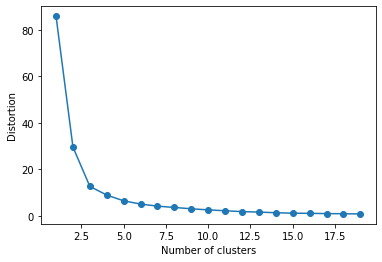

In [88]:
X = np.array(df)
from sklearn.cluster import k_means_
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

distortions = []
# Silhous = [] 
num_clusters = range(1,20)
for num in num_clusters:
    print(num)
    kmeanModel = k_means_.KMeans(n_clusters = num, n_init=20, max_iter=300, random_state=0).fit(X)
    distortions.append(kmeanModel.inertia_)
        
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [101]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_
labels

array([0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 0, 2, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0,
       0, 3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, 1, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0,

In [211]:
labels = pd.DataFrame(labels, columns = ['label'])
pd_label = pd.concat([df, labels, card_name], axis = 1)
# pd_label.loc[:30]
pd_label[pd_label["label"]==0]

,X,國泰世華.KOKO.icash聯名卡,三信銀行.VISA白金卡,上海商銀.TeresaCard,上海商銀.小小兵Bello回饋卡,上海商銀.簡單卡,土地銀行.JCB一卡通聯名晶緻卡,中國信託.ANA聯名卡,中國信託.LINE.Pay卡,中國信託.MUJI無印良品聯名卡,...,遠東商銀.快樂信用卡.1,聯邦銀行.法拉利無限卡.1,聯邦銀行.紅利卡.1,聯邦銀行.理財型白金卡.1,聯邦銀行.微風聯名卡.1,聯邦銀行.賴點一卡通御璽卡.1,國泰世華.KOKO.icash聯名卡.1,總計,label,Unnamed: 0
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,4,0.0,三信銀行-VISA白金卡
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,3,0.0,上海商銀-TeresaCard
5,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0.0,土地銀行-白金商務卡
6,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0.0,土地銀行-國際信用卡
7,11,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,3,0.0,中國信託-ANA晶緻聯名卡
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,386,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0.0,聯邦銀行-順發聯名卡
301,388,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0.0,聯邦銀行-農金一卡通聯名卡
302,389,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0.0,聯邦銀行-樂活悠遊御璽卡
303,390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,0.0,聯邦銀行-賴點一卡通御璽卡


# DBSCAN

# 全部

In [93]:
from sklearn.cluster import DBSCAN
import numpy as np
df = pd.read_excel(r'./card_feature_1128.xlsx',encoding='utf-16',sheet_name='all_z')
df = df.drop(['Unnamed: 0'], axis=1)
df

,Z國內回饋,Z國外回饋,Z國內哩程,Z國外哩程,Z自助加油,Z人工加油,Z免費接送次數,Z電影折扣優惠,Z網購刷卡回饋,Z保險刷卡回饋,...,Z保險,Z加油,Z行動支付,Z超商,Z交通,Z電影,Z旅遊機票飯店,Z網購,Z繳稅繳費,Z現金回饋
0,-0.343251,-0.359616,-0.263384,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.103921,-0.103817,-0.112808,-0.108305,-0.096907,-0.107092,-0.106166,-0.110602,-0.112616,-0.106151
1,-0.343251,-0.359616,-0.084066,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,1.085406,-0.223425,...,-0.067833,-0.061977,-0.085360,-0.066386,-0.087250,-0.067160,-0.084066,-0.071493,-0.112616,-0.086971
2,3.435343,3.137118,-0.037972,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.043142,-0.058758,-0.054480,-0.044651,-0.067935,-0.057944,-0.037972,-0.029375,-0.024519,-0.045872
3,2.718819,2.770853,0.040325,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,0.000543,-0.031401,-0.008734,-0.030678,0.012542,-0.041050,0.040325,-0.000293,-0.057935,0.032217
4,2.718819,1.205618,-0.109324,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.102021,-0.108645,-0.105946,-0.103647,-0.113003,-0.113236,-0.109324,-0.106591,-0.112616,-0.106836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,-0.343251,-0.359616,-0.113112,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.113417,-0.113472,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001
302,-0.343251,-0.359616,-0.097958,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.090625,-0.074851,-0.088791,-0.085017,-0.103346,-0.076375,-0.097958,-0.094557,-0.112616,-0.096561
303,-0.343251,-0.359616,0.004334,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,0.013838,0.024922,0.042732,0.064027,0.022199,-0.004189,0.004334,-0.013330,0.081804,0.015777
304,-0.343251,-0.359616,-0.113112,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.113417,-0.113472,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001


In [123]:
X = np.array(df)
clustering = DBSCAN(eps=1, min_samples=2).fit(X)
labels = clustering.labels_
labels

array([ 0,  0,  1,  1,  2,  0,  0,  0,  3,  4,  0,  5,  0,  0,  0,  6,  3,
        0,  0,  0,  1,  7,  0,  8,  8,  0,  0,  0,  0,  0,  0,  4,  0,  0,
        0,  0,  0,  0,  1,  0,  9,  9,  0, -1,  0,  0,  0,  1,  0,  0,  0,
       -1,  0, -1,  1,  0,  0,  0,  0,  2,  0,  0, 10,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  7,  0,  0, -1,
        0,  0,  0,  0, 10,  0,  0, 11,  0, 11,  0, 12,  0,  0, 12,  0, -1,
        0,  0,  2,  0,  0,  9,  0,  0,  0,  1, -1,  0,  0,  0, -1,  0,  0,
        6,  0, -1,  0, -1,  0,  9,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0, -1,  0,  9,
        0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  1,  5,  2,  0, 12, 12,
        0,  0,  0, -1, -1,  6,  0, -1, -1, 13,  0,  0,  1,  0,  0, 13,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0,  3,  0,  0,  3,  9, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0

In [137]:
labels = pd.DataFrame(labels, columns = ['label'])
pd_label = pd.concat([df, labels, card_name], axis = 1)
pd_label.loc[:30]

,Z國內回饋,Z國外回饋,Z國內哩程,Z國外哩程,Z自助加油,Z人工加油,Z免費接送次數,Z電影折扣優惠,Z網購刷卡回饋,Z保險刷卡回饋,...,Z行動支付,Z超商,Z交通,Z電影,Z旅遊機票飯店,Z網購,Z繳稅繳費,Z現金回饋,label,Unnamed: 0
0,-0.343251,-0.359616,-0.263384,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.112808,-0.108305,-0.096907,-0.107092,-0.106166,-0.110602,-0.112616,-0.106151,0,三信銀行-VISA白金卡
1,-0.343251,-0.359616,-0.084066,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,1.085406,-0.223425,...,-0.085360,-0.066386,-0.087250,-0.067160,-0.084066,-0.071493,-0.112616,-0.086971,0,上海商銀-TeresaCard
2,3.435343,3.137118,-0.037972,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.054480,-0.044651,-0.067935,-0.057944,-0.037972,-0.029375,-0.024519,-0.045872,1,上海商銀-小小兵Bello回饋卡
3,2.718819,2.770853,0.040325,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.008734,-0.030678,0.012542,-0.041050,0.040325,-0.000293,-0.057935,0.032217,1,上海商銀-簡單卡
4,2.718819,1.205618,-0.109324,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.105946,-0.103647,-0.113003,-0.113236,-0.109324,-0.106591,-0.112616,-0.106836,2,土地銀行-JCB一卡通聯名晶緻卡
5,-0.343251,-0.359616,-0.113112,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001,0,土地銀行-白金商務卡
6,-0.343251,-0.359616,-0.082804,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.086503,-0.098990,-0.096907,-0.110164,-0.082804,-0.100574,-0.106540,-0.108891,0,土地銀行-國際信用卡
7,-0.343251,-0.359616,-0.113112,2.778816,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001,0,中國信託-ANA晶緻聯名卡
8,-0.343251,-0.359616,-0.113112,4.280686,-0.134924,-0.122943,-0.195036,-0.191925,-0.154020,-0.223425,...,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001,3,中國信託-ANA極緻聯名卡
9,-0.343251,-0.359616,-0.113112,-0.224925,-0.134924,-0.122943,-0.195036,5.010813,-0.154020,-0.223425,...,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001,4,中國信託-Global Mall 聯名卡


In [201]:
pd_label[pd_label["label"]==1]

,Z國內回饋,Z國外回饋,Z國內哩程,Z國外哩程,Z自助加油,Z人工加油,Z免費接送次數,Z電影折扣優惠,Z網購刷卡回饋,Z保險刷卡回饋,...,Z行動支付,Z超商,Z交通,Z電影,Z旅遊機票飯店,Z網購,Z繳稅繳費,Z現金回饋,label,Unnamed: 0
2,3.435343,3.137118,-0.037972,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.15402,-0.223425,...,-0.054480,-0.044651,-0.067935,-0.057944,-0.037972,-0.029375,-0.024519,-0.045872,1,上海商銀-小小兵Bello回饋卡
3,2.718819,2.770853,0.040325,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.15402,-0.223425,...,-0.008734,-0.030678,0.012542,-0.041050,0.040325,-0.000293,-0.057935,0.032217,1,上海商銀-簡單卡
20,2.718819,3.553470,-0.091012,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.15402,-0.223425,...,-0.069348,-0.061729,-0.106565,-0.113236,-0.091012,-0.097566,0.036237,-0.071902,1,中國信託-中信商旅鈦金卡
38,3.331233,3.083900,-0.113112,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.15402,-0.223425,...,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001,1,元大銀行-Wi-Ho!Online聯名卡
47,2.718819,2.770853,-0.102378,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.15402,-0.223425,...,-0.104802,-0.098990,-0.090469,-0.107092,-0.102378,-0.105588,-0.094389,-0.100671,1,元大銀行-樂遊卡
54,2.718819,3.083900,-0.111218,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.15402,-0.223425,...,-0.111664,-0.109857,-0.109784,-0.111700,-0.111218,-0.110602,-0.112616,-0.110261,1,日盛銀行-無限卡
111,2.718819,2.770853,-0.113112,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.15402,-0.223425,...,-0.112808,-0.112962,-0.113003,-0.113236,-0.113112,-0.112608,-0.112616,-0.113001,1,永豐銀行-現金回饋卡
164,2.718819,2.927376,-0.109324,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.15402,-0.223425,...,-0.111664,-0.111410,-0.109784,-0.107092,-0.109324,-0.111605,-0.106540,-0.106151,1,合作金庫-合作金庫世界卡
182,3.331233,3.553470,0.142617,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.15402,-0.223425,...,0.070180,0.034529,0.025418,0.066461,0.142617,0.087954,0.005859,0.124690,1,星展銀行-炫晶御璽卡
250,2.718819,3.553470,-0.054389,-0.224925,-0.134924,-0.122943,-0.195036,-0.191925,-0.15402,-0.223425,...,-0.094509,-0.088122,-0.071155,-0.094805,-0.054389,-0.079515,-0.067049,-0.065052,1,華南銀行-享利樂活Combo卡


# OPTICS

# 全部

In [107]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel(r'./card_feature_1128.xlsx',encoding='utf-16',sheet_name='all_z')
df = df.drop(['Unnamed: 0'], axis=1)
df
X = np.array(df)
clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)
clust.fit(X)
labels = clust.labels_
labels

C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\cluster\optics_.py:791: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,